#Introduction 

The churn rate or  rate of attrition means the coustomers who discontinue their sibscibtion with the repective companies. 
* Now a days it becoming alarming to companies. 
* The churn rate is a critical indicator to track the health of a subscription-based companies. 
* The company can take precautions in advance by predicting the customer churn rate to retain customers consistently.  

# Explanation of data set

The raw data contains 7043 rows (customers) and 33 columns (features).

* we can group the above data/features into the following categories.

# Demographics
* CustomerID: A unique ID that identifies each customer.

* Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

* Gender: The customer’s gender: Male, Female

* Senior Citizen: Indicates if the customer is 65 or older: Yes, No

* Partner: Indicate if the customer has a partner: Yes, No

* Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
 
# Location

* Country: The country of the customer’s primary residence.

* State: The state of the customer’s primary residence.

* City: The city of the customer’s primary residence.

* Zip Code: The zip code of the customer’s primary residence.

* Lat Long: The combined latitude and longitude of the customer’s primary residence.

* Latitude: The latitude of the customer’s primary residence.

* Longitude: The longitude of the customer’s primary residence.

# Services

* Tenure in Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.


* Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

* Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

* Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

* Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

* Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

* Device Protection Plan: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

* Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

* Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

* Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

* Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

* Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

* Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

* Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

# Status

* Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

* Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

* Churn Score: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

* CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

* Churn Reason: A customer’s specific reason for leaving the company. Directly related to Churn Category.

# Importing data set

In [8]:
from google.colab import files                 # Importing the data set from local source
uploaded = files.upload()

Saving Telco_customer_churn.xlsx to Telco_customer_churn.xlsx


# Importing necessary libraries


In [12]:
import numpy as np                             # To perform wide variety of mathematical operations on arrays.
from datetime import datetime                  # Provide a number of functions to deal with date,time and time intervel.
import pandas as pd                            # which is used to data cleaning, processing and analysis.
import matplotlib.pyplot as plt                # Data visualization and graphical plotting.
import seaborn as sns                          # Making the statistical graphics.
import plotly.express as px                    # used for creating eantaire figure at once
import missingno as mns                        # Identifying the missing data within the dataframe

In [13]:
df = pd.read_excel('Telco_customer_churn.xlsx') # Reading the data set
df.head()                                       # using header function it will print first 5 rows

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [14]:
df.info()                                     # Getting the info of the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [15]:
df.isnull().sum()                             # Identifying null values and cummulating(adding) the all the values

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [18]:
df. duplicated().sum()                          # Checking null values and cummulating(adding) the all the values

0

## Q1: Please read the file and explain data types statistically as well as how python is reading it. Please let us know if any data type is read wrong.

column names---------------python reading dataset-----------statistical datat type      
---

* CustomerID------------------------------------          object(string data type)--------------------------------------------------Qunatitative__discreet
* Count--------------------------------------------                int64(numerical data type)--------------------------------------------------Quantitative__discreet
* Country------------------------------------------               object(string data type)--------------------------------------------------Quantitative__discreet
* State----------------------------------------------                 object(string data type)--------------------------------------------------Quantitative__discreet
* City-------------------------------------------------                  object(string data type)--------------------------------------------------Quantitative__discreet
* Zip Code----------------------------------------             int64(numeric data type)-------------------------------------------------Quantitative__discreet
* Lat Long------------------------------------------              object(string data type)--------------------------------------------------Quantitative__contineous
* Latitude-----------------------------------------             float64(numeric data type)-------------------------------------------------Quantitative__contineous
* Longitude--------------------------------------            float64(numeric data type)-------------------------------------------------Quantitative__contineous
* Gender--------------------------------------------                object(string data type)--------------------------------------------------Quantitative__discreet
* Senior Citizen----------------------------------        object(string data type)--------------------------------------------------Quantitative__discreet
* Partner---------------------------------------------               object(string data type)--------------------------------------------------Quantitative__discreet
* Dependents--------------------------------------            object(string data type)--------------------------------------------------Quantitative__discreet
* Tenure Months--------------------------------        int64(numeric data type)-------------------------------------------------Quantitative__discreet
* Phone Service-----------------------------------         object(string data type)--------------------------------------------------Quantitative__discreet
* Multiple Lines------------------------------------        object(string data type)--------------------------------------------------Quantitative__discreet
* Internet Service---------------------------------      object(string data type)--------------------------------------------------Quantitative__discreet
* Online Security----------------------------------       object(string data type)--------------------------------------------------Quantitative__discreet
* Online Backup-----------------------------------         object(string data type)--------------------------------------------------Quantitative__discreet
* Device Protection------------------------------     object(string data type)--------------------------------------------------Quantitative__discreet
* Tech Support-------------------------------------          object(string data type)--------------------------------------------------Quantitative__discreet
* Streaming TV-------------------------------------          object(string data type)--------------------------------------------------Quantitative__discreet
* Streaming Movies------------------------------      object(string data type)--------------------------------------------------Quantitative__discreet
* Contract---------------------------------------------              object(string data type)--------------------------------------------------Quantitative__discreet
* Paperless Billing---------------------------------     objec(string data type)---------------------------------------------------Quantitative__discreett
* Payment Method--------------------------------        object(string data type)--------------------------------------------------Quantitative__discreet
* Monthly Charges-------------------------------      float64(numeric data) type-------------------------------------------------Quantitative__contineous
* Total Charges-------------------------------------         float64(numeric data type)--------------------------------------------------Quantitative__contineous
* Churn Label----------------------------------------           object(string data type)--------------------------------------------------Quantitative__discreet
* Churn Value---------------------------------------          float64(numeric)-------------------------------------------------Quantitative__discreet
* Churn Score---------------------------------------          float64(numeric data type)-------------------------------------------------Quantitative__discreet
* CLTV--------------------------------------------------                 float64(numeric data type)-------------------------------------------------Quantitative__discreet
* Churn Reason-------------------------------------          object(string data type)--------------------------------------------------Quantitative__discreet

## * Python reading "Total changes and lat long" as a object(string) data type but it is Numerical(float) data type.

In [19]:
df.dtypes                                   # Identifying how python reading the data set

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

## Q2: Please apply appropriate statistical measures using python based on data types.

In [20]:
sm = df[['Tenure Months','Monthly Charges','Total Charges','Churn Score','CLTV']]  # Claculating statistical measures using pyhton for appropriate columns
sm.head()

,Tenure Months,Monthly Charges,Total Charges,Churn Score,CLTV
0,2,53.85,108.15,86,3239
1,2,70.70,151.65,67,2701
2,8,99.65,820.5,86,5372
3,28,104.80,3046.05,84,5003
4,49,103.70,5036.3,89,5340


In [24]:
sm['Total Charges'].astype(float)         # changing the 'Total charges' data type string to float

0        108.15
1        151.65
2        820.50
3       3046.05
4       5036.30
         ...   
7038    1419.40
7039    1990.50
7040    7362.90
7041     346.45
7042    6844.50
Name: Total Charges, Length: 7043, dtype: float64

In [30]:
sm.mean()                                 # Calculating the mean value(average) of the each column. 
                                          #  Based on this we can make insights.

Tenure Months        32.371149
Monthly Charges      64.761692
Total Charges      2283.300441
Churn Score          58.699418
CLTV               4400.295755
dtype: float64

In [31]:
sm.median()                               # Calculating median(middle) values of the each column. 
                                          # Not much necessary to read the deata but it become crucial while plotting the graphs and having skwed data.

Tenure Months        29.000
Monthly Charges      70.350
Total Charges      1397.475
Churn Score          61.000
CLTV               4527.000
dtype: float64

In [32]:
sm.mode()                                 # Calculating most repeated number in the mention colimns.
                                          # Based on this we can make insights. like we can observe that what is most repetitive churn score,Monthly charges,Total charges..etc

,Tenure Months,Monthly Charges,Total Charges,Churn Score,CLTV
0,1,20.05,20.2,80,5546


In [33]:
sm.std()                                  # Calculating standard deviation of above mention columns.
                                          # By calculating this we can see the data how it is dispersed.               

Tenure Months        24.559481
Monthly Charges      30.090047
Total Charges      2266.771362
Churn Score          21.525131
CLTV               1183.057152
dtype: float64

In [34]:
sm.var()                                 # It is square root of the standard deviation helpful to handle the skwed data.

Tenure Months      6.031681e+02
Monthly Charges    9.054109e+02
Total Charges      5.138252e+06
Churn Score        4.633313e+02
CLTV               1.399624e+06
dtype: float64

## Q3: What is the percentage of females and senior citizens in this data set? Please create appropriate plots and explain the plots.

In [36]:
df['Gender'].value_counts()

Male      3555
Female    3488
Name: Gender, dtype: int64

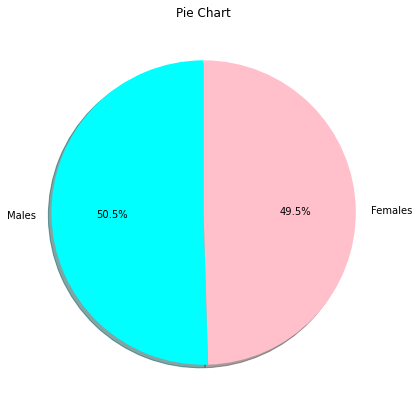

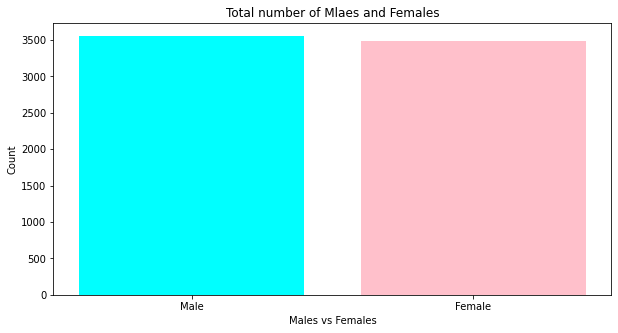

In [42]:
# Counting total numbers in each category
count = df['Gender'].value_counts()
# Checking the numbers
count
# Creating categories based on numbers
Gender = ['Males', 'Females']
# Creating plot
fig = plt.figure(figsize =(10, 7))
# changing colours
colors=['cyan','pink']
# Show plot
plt.pie(count, labels = Gender,autopct='%1.1f%%',shadow=True, startangle=90,colors=colors)
plt.title("Pie Chart")
plt.show()
# Counting total numbers in each category
count = df['Gender'].value_counts()
# Checking the numbers
count
# Creating categories based on numbers
Gender = ['Male', 'Female']
# Creating bar plot
fig = plt.figure(figsize=(10,5))
plt.bar(Gender, count, color=['cyan', 'pink'])
plt.title("Total number of Mlaes and Females")
plt.xlabel("Males vs Females")
plt.ylabel("Count")
# show plot
plt.show()

In [46]:
a=df['Senior Citizen'].value_counts()

No     5901
Yes    1142
Name: Senior Citizen, dtype: int64

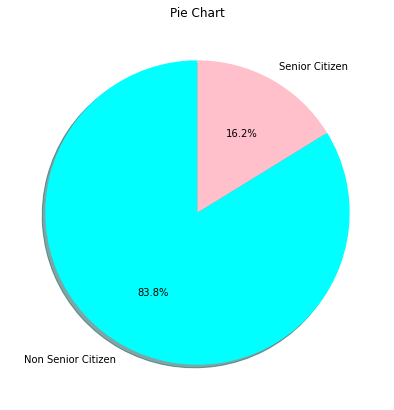

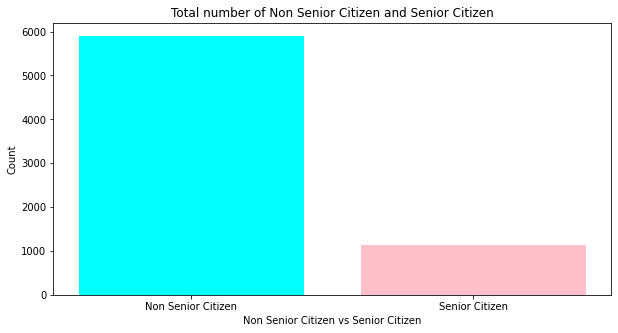

In [51]:
# Counting total numbers in each category
count = df['Senior Citizen'].value_counts()
# Checking the numbers
count
# Creating categories based on numbers
Senior_Citizen = ['Non Senior Citizen', 'Senior Citizen']
# Creating plot
fig = plt.figure(figsize =(10, 7))
# changing colours
colors=['cyan','pink']
# Show plot
plt.pie(count, labels = Senior_Citizen,autopct='%1.1f%%',shadow=True, startangle=90,colors=colors)
plt.title("Pie Chart")
plt.show()
# Counting total numbers in each category
count = df['Senior Citizen'].value_counts()
# Checking the numbers
count
# Creating categories based on numbers
Senior_Citizen = ['Non Senior Citizen', 'Senior Citizen']
# Creating bar plot
fig = plt.figure(figsize=(10,5))
plt.bar(Senior_Citizen, count, color=['cyan', 'pink'])
plt.title("Total number of Non Senior Citizen and Senior Citizen")
plt.xlabel("Non Senior Citizen vs Senior Citizen")
plt.ylabel("Count")
# show plot
plt.show()

## Q4:  Please create an appropriate plot to examine the distribution of the tenure month column and explain the distribution. Based on distribution, perform appropriate statistical measures. Please also explain if the variable is symmetric or skewed. Please calculate it. Explain everything as asked.

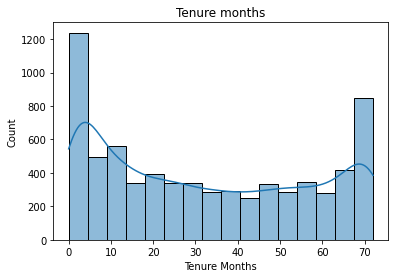

In [52]:
sns.histplot(x = df['Tenure Months'],kde = True)      # Creating histogram and also checking wether data is skewed or not.
plt.title("Tenure months")                            # assigning tittle to histotgram
plt.show()

In [54]:
df['Tenure Months'].skew()

0.2395397495619829

* By observing the above Histogram it is clear that data is not skewed and density curve distribution also symmetrical.
* The above skeweness is 0.24, it  is in range -0.5 to 0.5 so the above distribution is fiarly symmetric.  

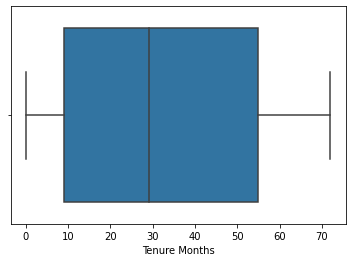

In [53]:
sns.boxplot(x = 'Tenure Months' ,data = df)          # Creating Box plot and checking weather the data is skewed or not.

* From the box plot also we can absorved that data is not skewed and it is symmetrical.
* From the box plot we can calculate IQR = Q3-Q1
* IQR = Q3-Q1
* IQR = 5.5 - 0.8 = 4.7 months
* Most of the customers are staying only in between 0-5 months in the company

## Q5: Please convert all binary columns into 0 and 1 using appropriate programming constructs, not one by one.

In [78]:
# selecting the appropriate columns which have bool data types
bny = df[['Senior Citizen','Partner','Dependents','Phone Service','Multiple Lines','Online Security','Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies','Paperless Billing','Churn Label']]
# assigning/replacing the values like if the data is "yes" then it is 1
bny [bny =='Yes'] =1
#  assigning/ replacing the values like if the data is "No" then it is 0
bny [bny =='No'] = 0
bny.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3718: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Churn Label
0,0,0,0,1,0,1,1,0,0,0,0,1,1
1,0,0,1,1,0,0,0,0,0,0,0,1,1
2,0,0,1,1,1,0,0,1,0,1,1,1,1
3,0,1,1,1,1,0,0,1,1,1,1,1,1
4,0,0,1,1,1,0,1,1,0,1,1,1,1


## Q6: Please examine the distribution of monthly charges between males and females using box plots. Please explain the results also. 

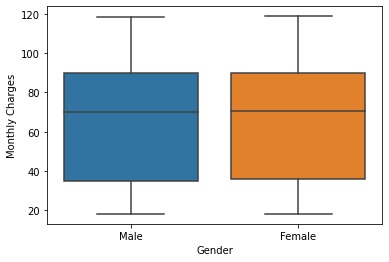

In [89]:
sns.boxplot(x= df['Gender'] , y = df['Monthly Charges'])    # creating the box plot on x axsis wew taken gender data and on y axsis we taken monthly charges.

* From the above box plot it is clear that their is slight difference in monthly charges between male and female.
* from the box plot it is not clear we have to calculate in other means to get visible results.
* The median line is also on the top side of the box plot.
* From this we can say that the data is negitively skewed. 

## Q7: Please find what is the minimum total charges for Los Angeles city. Please find which zip code has the maximum total charges.

In [128]:
# fetching the requried coluns data to get insight  
man = df[['City','Total Charges']]
man.head()

,City,Total Charges
0,Los Angeles,108.15
1,Los Angeles,151.65
2,Los Angeles,820.5
3,Los Angeles,3046.05
4,Los Angeles,5036.3


In [136]:
# calling the information of the above varible
man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   City           7043 non-null   object 
 1   Total Charges  7032 non-null   float64
dtypes: float64(1), object(1)
memory usage: 110.2+ KB


In [137]:
# to fill the blank places using error = coerce parameter to set the individual parsing the data.
man['Total Charges'] = pd.to_numeric(man['Total Charges'], errors='coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [138]:
# convertin the total charges from string data type to float data type 
sm['Total Charges'].astype(float) 

0        108.15
1        151.65
2        820.50
3       3046.05
4       5036.30
         ...   
7038    1419.40
7039    1990.50
7040    7362.90
7041     346.45
7042    6844.50
Name: Total Charges, Length: 7043, dtype: float64

In [140]:
# taking out only Los Angeles city data
x=man[(man['City']=='Los Angeles')]
x.head(10)

,City,Total Charges
0,Los Angeles,108.15
1,Los Angeles,151.65
2,Los Angeles,820.50
3,Los Angeles,3046.05
4,Los Angeles,5036.30
5,Los Angeles,528.35
6,Los Angeles,39.65
7,Los Angeles,20.15
8,Los Angeles,4749.15
9,Los Angeles,30.20


In [141]:
# calculating the minimum value
x.min()

City             Los Angeles
Total Charges           18.8
dtype: object

* Minumum total charges of the Los Angekes city is 18.8

### Calculating the maximum Total charges for which pincocde.

In [142]:
# defining the variables
mix=df[['Zip Code','Total Charges']]
mix.head()

,Zip Code,Total Charges
0,90003,108.15
1,90005,151.65
2,90006,820.5
3,90010,3046.05
4,90015,5036.3


In [143]:
# # calling the information of the above varible
mix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Zip Code       7043 non-null   int64 
 1   Total Charges  7043 non-null   object
dtypes: int64(1), object(1)
memory usage: 110.2+ KB


In [144]:
# to fill the blank places using error = coerce parameter to set the individual parsing the data.
mix['Total Charges'] = pd.to_numeric(mix['Total Charges'], errors='coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [145]:
# convertin the total charges from string data type to float data type  
sm['Total Charges'].astype(float) 

0        108.15
1        151.65
2        820.50
3       3046.05
4       5036.30
         ...   
7038    1419.40
7039    1990.50
7040    7362.90
7041     346.45
7042    6844.50
Name: Total Charges, Length: 7043, dtype: float64

In [146]:
# Calculating the maximum value at the pincode.
mix.max()

Zip Code         96161.0
Total Charges     8684.8
dtype: float64

* zip code 96161 has the highest total charges.

## Q8: Please find which payment method has the highest churn score and which has the lowest churn score.

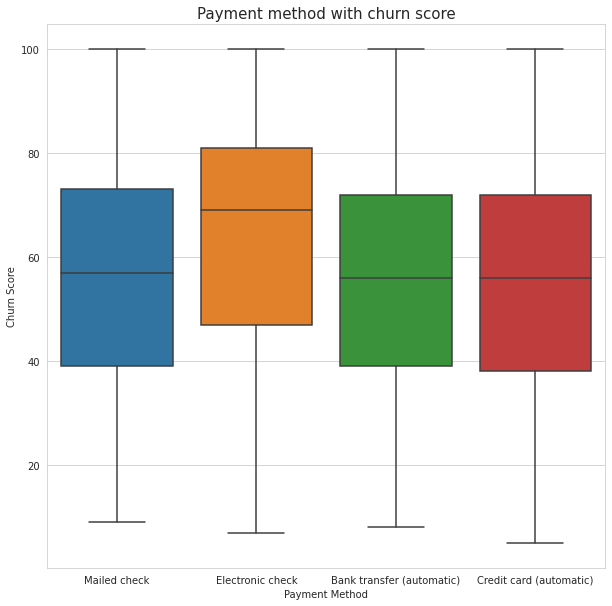

In [107]:
sns.set_style("whitegrid")                                          # for boxplot appling white grid pattren
plt.figure(figsize=(10,10))
plt.title("Payment method with churn score",size=15)
sns.boxplot(x= df['Payment Method'] , y = df['Churn Score']) 
plt.show()                                                          # printing the result

* From the above box plot it is clear that "electronic check" payment mode has the higest churn score and credit card(automatic) payment has the lowest churn score. 

## Q9: Please create an appropriate plot to check the count of payment methods and explain it.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


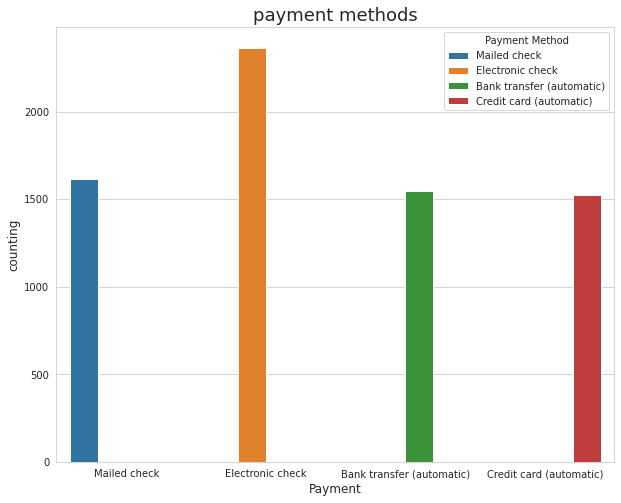

In [115]:
# scaling the  the plot size
plt.figure(figsize=(10,8))
# Creating the count plot on payment method
sns.countplot(df['Payment Method'],hue= df['Payment Method'])
# assigning the tittle lable 
plt.title("payment methods", size=18)
# assigning the x-axsis lable
plt.xlabel('Payment', size=12)
# assigning the y-axsis lable
plt.ylabel('counting', size=12)
# printing the result
plt.show()

* Above count plot shows that Electronic chech count is the best payment method and the lest performing payment method is Credit card(automatic).
* second position is Mailles chech.
* Third position is Bank Transfer(automatic).

## Q10: Please create an appropriate plot to see the relationship between monthly charges and total charges.

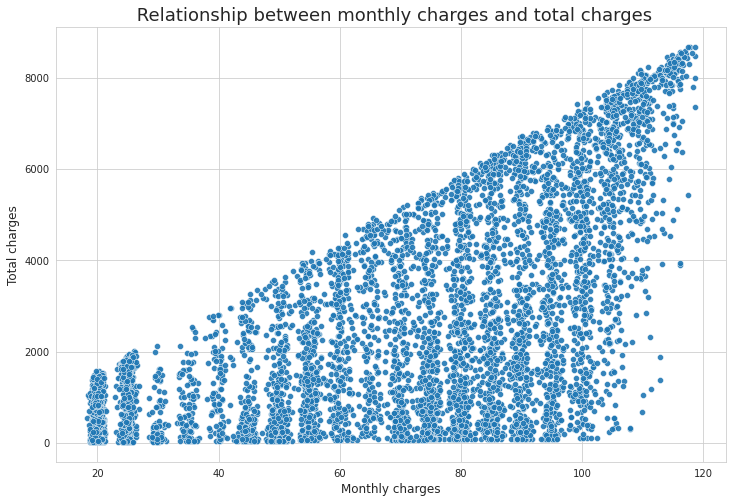

In [117]:
# scaling the  the plot size
plt.figure(figsize=(12,8))
#  creating  a scatterplot 
sns.scatterplot(x=df['Monthly Charges'],y=sm['Total Charges'],alpha=.9)
# assigning the tittle lable
plt.title(" Relationship between monthly charges and total charges",size=18)
#  assigning the x-axsis lable
plt.xlabel('Monthly charges', size=12)
# assigning the y-axsis lable
plt.ylabel('Total charges', size=12)
# printing the result
plt.show()# printing the result

* The above scatter plot shows that on increasing the total charges, monthly charges also increasing.
* The anbove scatter plot shows ressemble fairly perfect positive corelation scatter plot .
* Both total charges and monhly charges are corelated and proposnal to each other. 

# Conclusion 

* The given data set is throughly analysed and catagorised the data in statsically and also python reading the data. performed the statsitcal operations achived informative insights.copmared many columns and where eber it recuried plotted the graphs and visualsed the data and provied valuble insights to achive better results and performance.